# Bank Customer Churn Prediction

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"D:\DIGITAL SEM 3\Extra Projects\Datasets\Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [4]:
df.shape

(10002, 14)

The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

- Customer ID: A unique identifier for each customer
- Surname: The customer's surname or last name
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Dropping the null value column from the dataset
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# Checking for null values in the dataset
df.duplicated().sum()

2

In [10]:
# Dropping the duplicate column
df=df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
df.shape

(9996, 14)

In [12]:
df['Exited'].value_counts()

0    7959
1    2037
Name: Exited, dtype: int64

In [13]:
df['NumOfProducts'].value_counts()

1    5082
2    4588
3     266
4      60
Name: NumOfProducts, dtype: int64

In [14]:
df['Age'].value_counts()

37.00    478
38.00    477
35.00    474
36.00    455
34.00    447
        ... 
88.00      1
82.00      1
45.25      1
32.34      1
83.00      1
Name: Age, Length: 73, dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,9996.0,5.002498e+03,2885.744618,1.00,2503.75,5002.50,7.501250e+03,10000.00
CustomerId,9996.0,1.569095e+07,71928.404913,15565701.00,15628551.00,15690738.00,1.575323e+07,15815690.00
CreditScore,9996.0,6.505033e+02,96.624668,350.00,584.00,652.00,7.172500e+02,850.00
Age,9996.0,3.892107e+01,10.488421,18.00,32.00,37.00,4.400000e+01,92.00
Tenure,9996.0,5.013305e+00,2.892353,0.00,3.00,5.00,7.250000e+00,10.00
Balance,9996.0,7.647626e+04,62397.118820,0.00,0.00,97173.29,1.276394e+05,250898.09
NumOfProducts,9996.0,1.530212e+00,0.581684,1.00,1.00,1.00,2.000000e+00,4.00
HasCrCard,9996.0,7.054822e-01,0.455849,0.00,0.00,1.00,1.000000e+00,1.00
IsActiveMember,9996.0,5.149060e-01,0.499803,0.00,0.00,1.00,1.000000e+00,1.00
EstimatedSalary,9996.0,1.001067e+05,57513.314398,11.58,51002.11,100238.11,1.494001e+05,199992.48


In [16]:
df['Age']=df['Age'].astype(int)

In [17]:
# Dropping the non relevant columns from the dataset 
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)


In [18]:
color_1 = sn.color_palette("Paired",10)
color_2 = sn.color_palette("hot",10)
color_3 = sn.color_palette("Spectral_r",10)
color_4 = sn.color_palette()

0    7959
1    2037
Name: Exited, dtype: int64


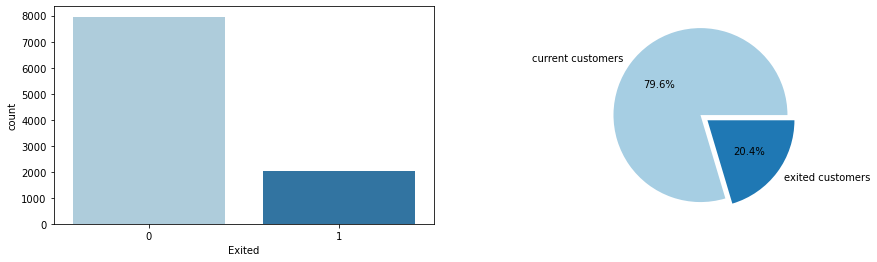

In [19]:
# Visualizing the target column in the dataset.
# plotting the count plot and the pie chart for 'Exited' column
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sn.countplot(x=df["Exited"],palette=color_1)

plt.subplot(1,2,2)
plt.pie(df["Exited"].value_counts(),explode=[0.0,0.1],labels=["current customers","exited customers"],
        colors=color_1,autopct="%.01f%%")
print(df["Exited"].value_counts())

Exited  Geography
0       France       4201
        Spain        2063
        Germany      1695
1       Germany       814
        France        810
        Spain         413
Name: Geography, dtype: int64


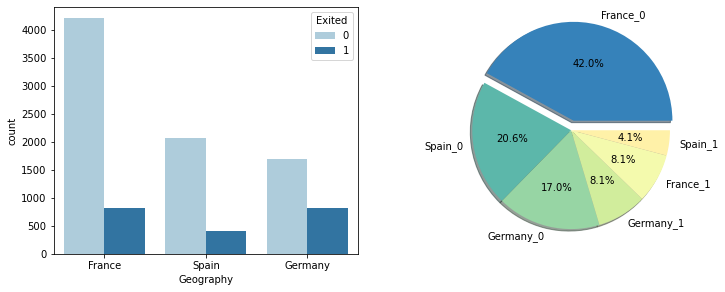

In [20]:
# Visualizing the 'Geography' column
label = ["France_0","Spain_0","Germany_0","Germany_1","France_1","Spain_1"]
eplode = [0.1,0.0,0.0,0.0,0.0,0.0]
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sn.countplot(data=df,x="Geography",hue="Exited",palette=color_1)
plt.subplot(2,2,2)
plt.pie(df.Geography.groupby(df.Exited).value_counts(),explode=eplode,shadow=True,colors=color_3,
        labels=label,autopct="%0.1f%%")


print(df.Geography.groupby(df.Exited).value_counts())

- We can see that France(8.1%) & Germany(8.1%) has more number of customer that exited 
- More Customers are from the country France
- Spain has very less exited custermers, around 4.1% 

Exited  Gender
0       Male      4556
        Female    3403
1       Female    1139
        Male       898
Name: Gender, dtype: int64


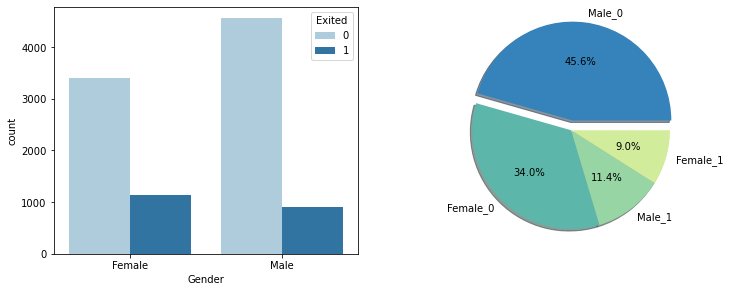

In [21]:
# Visualizing the 'Gender' co0lumn in the dataset
label = ["Male_0","Female_0","Male_1","Female_1"]
eplode = [0.1,0.0,0.0,0.0,]
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sn.countplot(data=df,x="Gender",hue="Exited",palette=color_1)
plt.subplot(2,2,2)
plt.pie(df.Gender.groupby(df.Exited).value_counts(),explode=eplode,shadow=True,colors=color_3,
        labels=label,autopct="%0.1f%%")


print(df.Gender.groupby(df.Exited).value_counts())

- The Male customers are more in the exited customer count about 11.4%
- Female customers has non-exited about 34% and exited about 9%

In [22]:
print(df.Tenure.groupby(df.Exited).value_counts())

Exited  Tenure
0       7         850
        2         845
        8         828
        1         803
        5         803
        3         796
        4         785
        6         771
        9         771
        10        389
        0         318
1       1         232
        3         213
        9         213
        5         209
        4         203
        2         201
        8         197
        6         196
        7         177
        10        101
        0          95
Name: Tenure, dtype: int64


<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

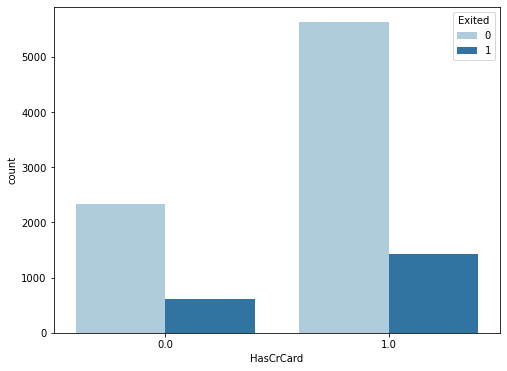

In [23]:
plt.figure(figsize=(8,6))
sn.countplot(data=df,x="HasCrCard",hue="Exited",palette=color_1)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

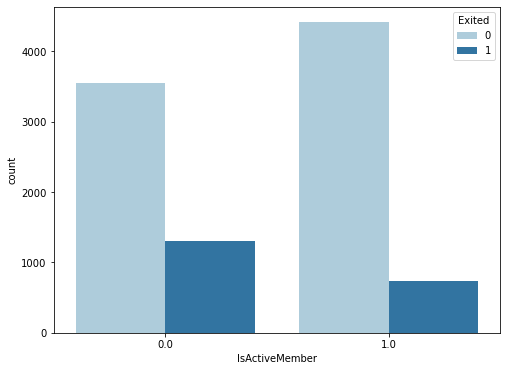

In [24]:
plt.figure(figsize=(8,6))
sn.countplot(data=df,x="IsActiveMember",hue="Exited",palette=color_1)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

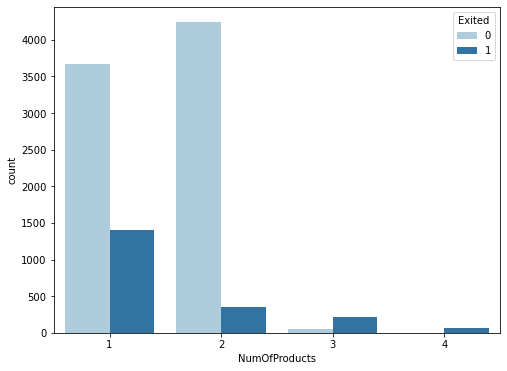

In [25]:
plt.figure(figsize=(8,6))
sn.countplot(data=df,x="NumOfProducts",hue="Exited",palette=color_1)

In [26]:
X=df.drop("Exited",axis=1)
y=df['Exited']

In [27]:
#model training and testing (80-for training and 20-for testing )
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=43)

In [28]:
print(X_train.shape)
print(X_test.shape)

(7996, 10)
(2000, 10)


In [29]:
# A function to perform ordinal encoding on the specified column in the dataset
def perform_ordinal_encoding(X_train, X_test, columns):
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    
    # Initialize the OrdinalEncoder
    ordinal_encoder = OrdinalEncoder()
    
    # Fit the encoder on the training data and transform both training and testing data
    X_train_encoded[columns] = ordinal_encoder.fit_transform(X_train[columns])
    X_test_encoded[columns] = ordinal_encoder.transform(X_test[columns])
    
    return X_train_encoded, X_test_encoded


In [30]:
col_list=['Gender','Geography'] # column-list to which the encoding will be performed
X_train,X_test=perform_ordinal_encoding(X_train,X_test,col_list)

In [31]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6103,655,0.0,1.0,28,10,0.00,2,0.0,1.0,126565.21
4863,464,0.0,0.0,33,10,147493.70,2,1.0,0.0,100447.53
8601,640,1.0,1.0,45,8,120591.19,1,0.0,0.0,195123.94
1420,724,2.0,1.0,45,5,83888.54,1,0.0,1.0,34121.81
8279,605,0.0,0.0,34,2,0.00,1,0.0,0.0,35982.42
...,...,...,...,...,...,...,...,...,...,...
8503,559,0.0,0.0,48,2,0.00,2,0.0,1.0,137961.41
2068,658,2.0,0.0,31,2,36566.96,1,1.0,0.0,103644.98
7989,645,0.0,1.0,39,8,0.00,2,0.0,0.0,96864.36
2307,610,1.0,1.0,57,6,106938.11,2,0.0,1.0,186612.47


In [32]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8549,731,0.0,1.0,37,8,0.00,2,1.0,1.0,170338.35
6260,666,0.0,0.0,32,10,112536.57,2,1.0,1.0,34350.54
5337,815,2.0,0.0,57,5,0.00,3,0.0,0.0,38941.44
9810,712,2.0,1.0,27,10,0.00,1,1.0,0.0,94544.88
5863,748,0.0,1.0,40,3,95297.11,1,0.0,0.0,171515.84
...,...,...,...,...,...,...,...,...,...,...
9973,611,0.0,1.0,27,7,0.00,2,1.0,1.0,157474.10
6809,684,0.0,0.0,26,5,87098.91,1,0.0,0.0,106095.82
215,668,1.0,1.0,47,7,106854.21,1,0.0,1.0,157959.02
2244,515,0.0,0.0,66,6,0.00,2,1.0,1.0,160663.11


In [33]:
scale_list = ['CreditScore','Age', 'Tenure', 'Balance','EstimatedSalary'] # List of attribute on which the scaling needs to be applied

mix_scaler = MinMaxScaler()
X_train[scale_list]= mix_scaler.fit_transform(X_train[scale_list])
X_test[scale_list]= mix_scaler.fit_transform(X_test[scale_list])

In [34]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6103,0.610,0.0,1.0,0.135135,1.0,0.000000,2,0.0,1.0,0.632829
4863,0.228,0.0,0.0,0.202703,1.0,0.587863,2,1.0,0.0,0.502228
8601,0.580,1.0,1.0,0.364865,0.8,0.480638,1,0.0,0.0,0.975655
1420,0.748,2.0,1.0,0.364865,0.5,0.334353,1,0.0,1.0,0.170567
8279,0.510,0.0,0.0,0.216216,0.2,0.000000,1,0.0,0.0,0.179871
...,...,...,...,...,...,...,...,...,...,...
8503,0.418,0.0,0.0,0.405405,0.2,0.000000,2,0.0,1.0,0.689815
2068,0.616,2.0,0.0,0.175676,0.2,0.145744,1,1.0,0.0,0.518216
7989,0.590,0.0,1.0,0.283784,0.8,0.000000,2,0.0,0.0,0.484310
2307,0.520,1.0,1.0,0.527027,0.6,0.426221,2,0.0,1.0,0.933094


#### Logistic Regression Model

In [35]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred_log = log_reg.predict(X_test)

In [36]:
acc_log=accuracy_score(y_test,pred_log)
print("accuracy:",acc_log)

prec_log=precision_score(y_test,pred_log)
print("precision score:",prec_log)

recall_log=recall_score(y_test,pred_log)
print("recall score:",recall_log)


f1_log=f1_score(y_test,pred_log)
print("f1 score:",f1_log)

accuracy: 0.808
precision score: 0.5776699029126213
recall score: 0.2860576923076923
f1 score: 0.38263665594855306


In [37]:
print(classification_report(y_test,pred_log))


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1584
           1       0.58      0.29      0.38       416

    accuracy                           0.81      2000
   macro avg       0.71      0.62      0.63      2000
weighted avg       0.78      0.81      0.78      2000



#### Random Forest Classifier

In [38]:
clf_rf=RandomForestClassifier()
clf_rf.fit(X_train,y_train)
pred_rf=clf_rf.predict(X_test)

In [39]:
acc_rf=accuracy_score(y_test,pred_rf)
print("accuracy:",acc_rf)

prec_rf=precision_score(y_test,pred_rf)
print("precision score:",prec_rf)

recall_rf=recall_score(y_test,pred_rf)
print("recall score:",recall_rf)


f1_rf=f1_score(y_test,pred_rf)
print("f1 score:",f1_rf)

accuracy: 0.8455
precision score: 0.686411149825784
recall score: 0.4735576923076923
f1 score: 0.5604551920341394


In [40]:
print(classification_report(y_test,pred_rf))


              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1584
           1       0.69      0.47      0.56       416

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.83      0.85      0.83      2000



#### MLP Classifier

In [41]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train,y_train)
pred_nn=clf.predict(X_test)


In [42]:
accuracy=accuracy_score(y_test,pred_nn)
precision=precision_score(y_test,pred_nn)
recall=recall_score(y_test,pred_nn)
f1_score=f1_score(y_test,pred_nn)



print("accuracy:",accuracy*100)
print("precision score:",precision*100)
print("recall score:",recall*100)
print("f1 score:",f1_score*100)

accuracy: 84.05
precision score: 67.13780918727915
recall score: 45.67307692307692
f1 score: 54.36337625178827


In [43]:
print(classification_report(y_test,pred_nn))


              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1584
           1       0.67      0.46      0.54       416

    accuracy                           0.84      2000
   macro avg       0.77      0.70      0.72      2000
weighted avg       0.83      0.84      0.83      2000



In [44]:
data_dict={'Model Name':['Logistic Regression','Random Forest', 'MLP Classifier'],
          'Accuracy':[acc_log,acc_rf,accuracy],
          'Precision':[prec_log,prec_rf,precision],
          'Recall':[recall_log,recall_rf,recall],
          'F1-Score':[f1_log,f1_rf,f1_score]}
data_dict=pd.DataFrame(data_dict)
data_dict

,Model Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.8080,0.577670,0.286058,0.382637
1,Random Forest,0.8455,0.686411,0.473558,0.560455
2,MLP Classifier,0.8405,0.671378,0.456731,0.543634


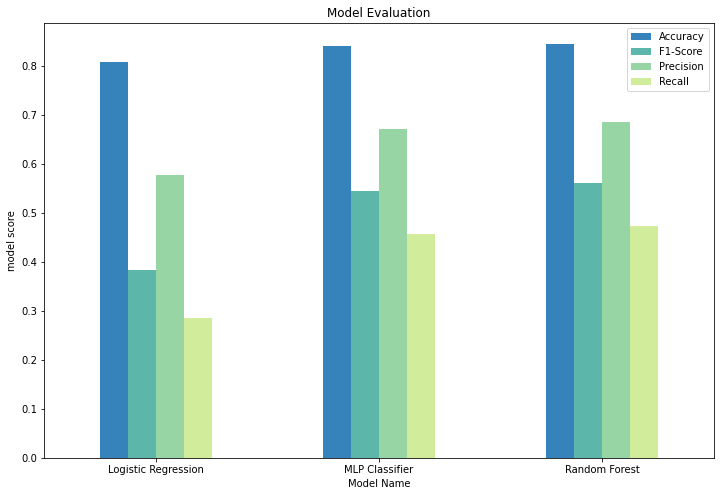

In [45]:
pd.pivot_table(data=data_dict,values=["Accuracy",
                                 "Precision",
                                 "Recall",
                                 "F1-Score"],
               index=["Model Name"]).plot.bar(ylabel = "model score",
                                              title="Model Evaluation",color=color_3,rot=0,figsize=(12,8))
plt.show()

   - Random Forest Classifier gave good results compared to other models 
   - RFC: accuracy=85%, precision=69%, Recall=47% and F1-Score=56%